## Extract bubble from simulations

In [2]:
cd '/home/dpirvu/project/prefactor/'

/home/dpirvu/project/prefactor


In [3]:
import os,sys
sys.path.append('/home/dpirvu/python_stuff/')
sys.path.append('/home/dpirvu/project/prefactor/plus_bubbles_codes')
sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/hmvec-master')
print(sys.path)
from plotting import *
from bubble_tools import *
from experiment import *
from celluloid import Camera

%matplotlib inline

['/home/dpirvu/project/prefactor', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/python_stuff/', '/home/dpirvu/project/prefactor/plus_bubbles_codes']


In [4]:
def beautify(ax, ttl=None, bb=None, lens=True):
    try:
        len(ax)
    except:
        ax = np.array([ax])
    for ai, aa in enumerate(ax.flatten()):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        #aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
        if lens:
            aa.legend(title=ttl, bbox_to_anchor=bb, frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
    return ax

def beautify_anim(ax, ttl=None, bb=None):
    try:
        len(ax)
    except:
        ax = np.array([ax])
    for ai, aa in enumerate(ax.flatten()):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
    return ax


In [ ]:
%run './plus_bubbles_codes/experiment.py'
case = 'plus'
general = get_general_model(case)
tempList, massq, right_Vmax, V, dV, Vinv, nTimeMAX, minSim, maxSim = general
nTimeMAX = 32768
tlist = np.arange(duration) * 8 * dtout
maxSim = 50

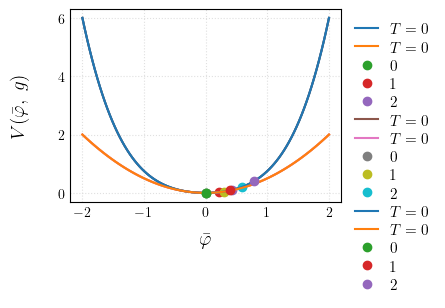

In [9]:
if True:
    philist = np.linspace(-2., 2., 100)
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))

    for tmp in range(len(tempList)):
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])

        ax.plot(philist, V(philist), label=r'$T={:.0f}$'.format(temp))
        ax.plot(philist, 0.5*philist**2., label=r'$T={:.0f}$'.format(temp))
       # ax.plot(philist, 0.5*philist**2., label=r'$T={:.0f}$'.format(temp))
        for nn in np.linspace(0, 2, 3):
            ax.plot(nn*sigmafld, V(nn*sigmafld), 'o', label=r'${:.0f}$'.format(nn))

    ax.set_xlabel(r'$\bar{\varphi}$')
    ax.set_ylabel(r'$V(\bar{\varphi},\; g)$')
    beautify(ax, bb=(1,1))
    plt.savefig('./plots/potential.pdf')
    plt.show()


In [10]:
# check energy time evolution in the free field case
# in initial conditions check potential and kinetic conservation separately, should satisfy equilibrium condition
# in each ensemble as a funciton of temp, total energy should be T*N
# do the same for time evolution of potential and kinetic and check equipartition i.e. KE=PE=TN/2
# check total average energy without short modes
# set momentum and field with different mass over finite low k range


# check exchange between kinetic and potential energy in each mode
# eg: set for i = k1, k2, 1: fld * sqrt(2)

# Initialize at low T momentum modes with effective mass, but the field modes intialize with bare mass, non-equilibrium mass


# check this decay rate as a funciton of courrant number, lattice spacing and box size
# 0.09, 0.095, 0.1
# decat time as tclock + len simulation
# test that the temeprature doesnt time evolve by looking at the effective 
# thermal mass evolution in time; for example can try with concate potential 
# check evolutoin of effective mass at various temepratures up to 0.6; and effective temperatures up to timescales 1e6
# try sinusoidal power spectrum in low k modes

# Check kinetic energy is exactly T/a, potential receives corrections


In [19]:
root_dir      = '/gpfs/dpirvu/prefactor/test_virialization'
batch_params  = lambda num,nL,m2,te: num+'_x'+str(int(nL))+'_m2eff'+str('%.4f'%m2)+'_T'+str('%.4f'%te) 

sim_location = lambda num,nL,m2,te,sim: root_dir + batch_params(num,nL,m2,te) + '_sim'      +str(sim)+'_fields.dat'


In [20]:
do = False
if do:
    nTimeMAX = 32768
    fftfld = np.zeros((2, maxSim, nTimeMAX//8, knyq))
    fftmom = np.zeros((2, maxSim, nTimeMAX//8, knyq))
    print('starting')

    for ni, num in enumerate(['', '1']):
        tmp = 1
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = [num, nLat, m2, temp]

        for sim in range(maxSim):
            path2sim = sim_location(*exp_params, sim)
            print(path2sim)

            tdecay, initcond, real, outcome = get_realisation(nLat, sim, nTimeMAX, path2sim)
            fld, mom = real[0], real[1]
            fftfld[ni, sim] = np.fft.rfft(fld, axis=-1, norm=None)
            fftmom[ni, sim] = np.fft.rfft(mom, axis=-1, norm=None)

    print('saving')

    np.save('save_all_fft_field.npy', fftfld)
    np.save('save_all_fft_momentum.npy', fftmom)

In [21]:
tmp = 1
num = ''
temp, m2, sigmafld = get_model(*general, tmp, case)
exp_params = [num, nLat, m2, temp]
print('Experiment', exp_params)

sim = 0
path2sim = sim_location(*exp_params, sim)
print(path2sim)

tdecay, initcond, real, outcome = get_realisation(nLat, sim, nTimeMAX, path2sim)
real[np.isnan(real)] = 0.

nC, nT, nN = np.shape(real)
fld, mom = real[0], real[1]
duration = nT


Experiment ['', 2048, 1.3, 0.2]
/gpfs/dpirvu/prefactor/test_virialization_x2048_m2eff1.3000_T0.2000_sim0_fields.dat


In [22]:
KEN_real, GEN_real, PEN_real, TEN_real = get_simulation_energy(real, nLat, lenLat)

ValueError: x and y must have same first dimension, but have shapes (2048,) and (4096,)

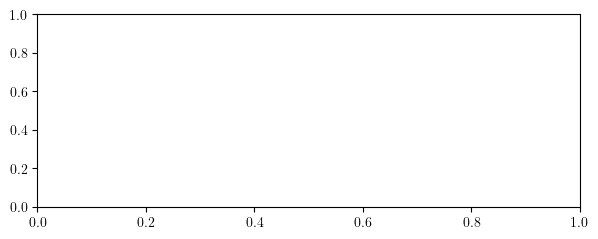

In [23]:
fig, ax = plt.subplots(1,1, figsize = (7,2.5))

ax.plot(tlist, KEN_real/KEN_real[0] - 1., label=r'$KE$',  ls='-', color='g')
ax.plot(tlist, GEN_real/GEN_real[0] - 1., label=r'$GE$',  ls='-', color='r')
ax.plot(tlist, PEN_real/PEN_real[0] - 1., label=r'$PE$',  ls='-', color='yellow')
ax.plot(tlist, TEN_real/TEN_real[0] - 1., label=r'$TE$',  ls='-', color='b')

ax.set_xlabel(r'$t$')
ax.set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim) + r', $T={:.2f}$'.format(temp))
beautify(ax)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (7,2.5))
ax.axhline(temp * nLat / 2, ls=':', color='darkgray')
ax.axhline(temp * nLat, ls=':', color='darkgray')

ax.plot(tlist, KEN_real, label=r'$KE$',  ls='-', color='g')
ax.plot(tlist, GEN_real + PEN_real, label=r'$GE + PE$',  ls='-', color='r')
ax.plot(tlist, TEN_real, label=r'$TE$',  ls='-', color='b')

ax.set_xlabel(r'$t$')
ax.set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim) + r', $T={:.2f}$'.format(temp))
beautify(ax)
plt.tight_layout()
plt.show()

In [6]:
fftfld = np.load('save_all_fft_field.npy')
fftmom = np.load('save_all_fft_momentum.npy')

In [25]:
nT

4096

In [7]:
numlist = ['', '1']

In [24]:
if True:
    cych = cycle(allcolors)
    tmp = 1
    for ni, num in enumerate(numlist):
        temp, m2, sigmafld = get_model(*general, tmp, case)

        for sim in range(5):
            # modes to plot:
            aa, bb = 1, knyq//2

            tslist = np.linspace(tlist[0], tlist[-1], 4)
            #fldPS = np.mean(np.abs(fftfld[ni, :])**2. * 2. / nLat**2., axis=0)
            fldPS = np.abs(fftfld[ni, sim])**2. * 2. / nLat**2.
            #momPS = np.mean(np.abs(fftmom[ni, :])**2. * 2. / nLat**2., axis=0)
            momPS = np.abs(fftmom[ni, sim])**2. * 2. / nLat**2.
            avfldPS, avmomPS = np.zeros((2, len(tslist)-1, knyq))

            for ti, (t1, t2) in enumerate(zip(tslist[:-1], tslist[1:])):
                indxt = (tlist>=t1)&(tlist<t2)
                avfldPS[ti] = np.mean(fldPS[indxt], axis=0)
                avmomPS[ti] = np.mean(momPS[indxt], axis=0)
            tslist = tslist[:-1]

            fig, ax = plt.subplots(1,2, figsize = (8.,3.5))
            ax[0].plot(klist[aa:bb], pspec(temp,m2)[aa:bb], ls='-', color='k')
            ax[1].plot(klist[aa:bb], (w2(m2)*pspec(temp,m2))[aa:bb], ls='-', color='k')

            ax[0].plot(klist[aa:bb], fldPS[0][aa:bb], ls=':', color='k')
            ax[1].plot(klist[aa:bb], momPS[0][aa:bb], ls=':', color='k')

            for tind, tt in enumerate(reversed(tslist)):
                col = next(cych)
                tind = len(tslist) - 1 - tind
                lab = r'${:.2f}$'.format(dx * np.arange(nTimeMAX)[np.argmin(np.abs(np.arange(nTimeMAX)*dx - tslist[tind]))])

                curve = avfldPS[tind, aa:bb]
                ax[0].plot(klist[aa:bb], curve, ls='-', color=col, alpha=0.5, lw=1, label=lab)

                curve = avmomPS[tind, aa:bb]
                ax[1].plot(klist[aa:bb], curve, ls='-', color=col, alpha=0.5, lw=1, label=lab)

        #        curve = avfldPS[tind, aa:bb]
        #        curve = gaussian_filter1d(curve, 6, mode='nearest')
        #        ax[0].plot(klist[aa:bb], curve, ls='-', color=col)

         #       curve = avmomPS[tind, aa:bb]
         #       curve = gaussian_filter1d(curve, 6, mode='nearest')
         #      ax[1].plot(klist[aa:bb], curve, ls='-', color=col)

            for aa in ax:
                h, l = aa.get_legend_handles_labels() # Extracting handles and labels
                h, l = h[::-1], l[::-1]
                handles = [aa.plot([],marker="", ls="")[0]] + h
                labels = [r'$t:$'] + l  # Merging labels
                leg = aa.legend(handles, labels, ncol=len(tslist)+1, frameon=False, loc=1, handlelength=1., labelspacing=0.3, columnspacing=0.5)
            [aa.set_xscale('log') for aa in ax]
            [aa.set_yscale('log') for aa in ax]
            [aa.set_xlabel(r'$k$') for aa in ax]
            ax[0].set_title(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \Big/ \left|\bar{\varphi}_k(0)\right|^2 \right\rangle $')
            ax[1].set_title(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \Big/ \left|\bar{\Pi}_k(0)\right|^2 \right\rangle $')
            beautify(ax, lens=False, ttl=r'$\rm Sim = {:.0f}$'.format(sim))
            plt.tight_layout()
            plt.savefig('./plots/powespec_tevol.pdf')
            plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 4096 but corresponding boolean dimension is 2048

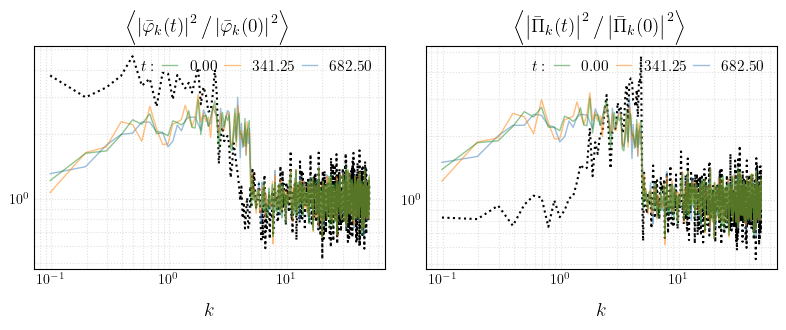

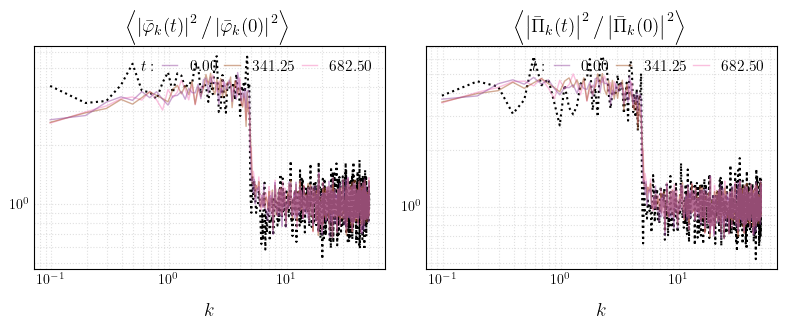

In [141]:
if True:
    cych = cycle(allcolors)
    tmp = 1
    for ni, num in enumerate(numlist):
        temp, m2, sigmafld = get_model(*general, tmp, case)

        # modes to plot:
        aa, bb = 1, knyq//2
        
        tslist = np.linspace(tlist[0], tlist[-1], 4)
        fldPS = np.mean(np.abs(fftfld[ni, :])**2. * 2. / nLat**2., axis=0)
        momPS = np.mean(np.abs(fftmom[ni, :])**2. * 2. / nLat**2., axis=0)
        avfldPS, avmomPS = np.zeros((2, len(tslist)-1, knyq))

        for ti, (t1, t2) in enumerate(zip(tslist[:-1], tslist[1:])):
            indxt = (tlist>=t1)&(tlist<t2)
            avfldPS[ti] = np.mean(fldPS[indxt], axis=0)
            avmomPS[ti] = np.mean(momPS[indxt], axis=0)
        tslist = tslist[:-1]

        fig, ax = plt.subplots(1,2, figsize = (8.,3.5))
        ax[0].plot(klist[aa:bb], fldPS[0][aa:bb]/pspec(temp,m2)[aa:bb], ls=':', color='k')
        ax[1].plot(klist[aa:bb], momPS[0][aa:bb]/(w2(m2)*pspec(temp,m2))[aa:bb], ls=':', color='k')

        for tind, tt in enumerate(reversed(tslist)):
            col = next(cych)
            tind = len(tslist) - 1 - tind
            lab = r'${:.2f}$'.format(dx * np.arange(nTimeMAX)[np.argmin(np.abs(np.arange(nTimeMAX)*dx - tslist[tind]))])

            curve = avfldPS[tind, aa:bb]/pspec(temp,m2)[aa:bb]
            ax[0].plot(klist[aa:bb], curve, ls='-', color=col, alpha=0.5, lw=1, label=lab)

            curve = avmomPS[tind, aa:bb]/(w2(m2)*pspec(temp,m2))[aa:bb]
            ax[1].plot(klist[aa:bb], curve, ls='-', color=col, alpha=0.5, lw=1, label=lab)

        for aa in ax:
            h, l = aa.get_legend_handles_labels() # Extracting handles and labels
            h, l = h[::-1], l[::-1]
            handles = [aa.plot([],marker="", ls="")[0]] + h
            labels = [r'$t:$'] + l  # Merging labels
            leg = aa.legend(handles, labels, ncol=len(tslist)+1, frameon=False, loc=1, handlelength=1., labelspacing=0.3, columnspacing=0.5)
        [aa.set_xscale('log') for aa in ax]
        [aa.set_yscale('log') for aa in ax]
        [aa.set_xlabel(r'$k$') for aa in ax]
        ax[0].set_title(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \Big/ \left|\bar{\varphi}_k(0)\right|^2 \right\rangle $')
        ax[1].set_title(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \Big/ \left|\bar{\Pi}_k(0)\right|^2 \right\rangle $')
        beautify(ax, lens=False, ttl=r'$\rm Sim = {:.0f}$'.format(sim))
        plt.tight_layout()
        plt.savefig('./plots/powespec_tevol.pdf')
        plt.show()

5
10
22
48
104
223
478
1024


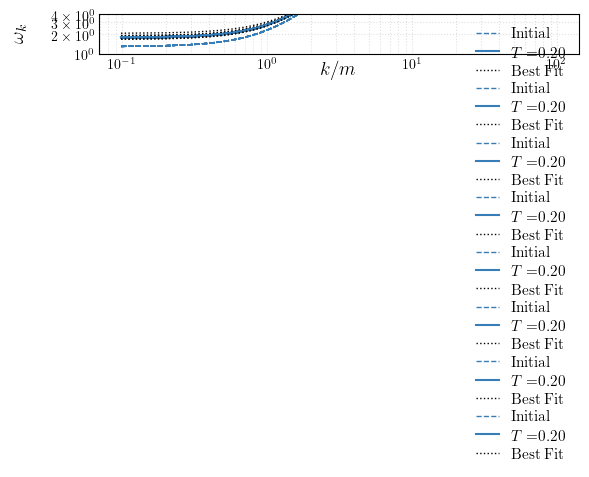

In [131]:
if True:
    save_meff = []
    cols=cycle(allcolors)
    fig, ax = plt.subplots(1, 1, figsize = (6,3.))
    
    tmp = 1
    KMAXList = [int(ii) for ii in np.geomspace(5, nLat//2, 8)]

    for ni, num in enumerate(numlist):
        if ni!=1: continue

        temp, m2, sigmafld = get_model(*general, tmp, case)
        col = next(cols)
        save_meff.append([])

        for KMAX in KMAXList:
            save_meff[-1].append([])

            tslistshort = np.linspace(tlist[0], tlist[-1], 4)
            tslistshort2= np.linspace(tlist[0], tlist[-1], 4)
            fldPS = np.mean(np.abs(fftfld[ni, :])**2. * 2. / nLat**2., axis=0)
            momPS = np.mean(np.abs(fftmom[ni, :])**2. * 2. / nLat**2., axis=0)
            avfldPS, avmomPS = np.zeros((2, len(tslist)-1, knyq))

            # modes to plot:
            indmax = np.argmin(np.abs(np.arange(len(klist)) - KMAX)); print(indmax)
            aa, bb = 1, indmax

            avfldPS, avmomPS = np.zeros((2, len(tslistshort)-1, knyq))
            for ti, (t1, t2) in enumerate(zip(tslistshort[:-1], tslistshort[1:])):
                indxt = (tlist>=t1)&(tlist<t2)
                avfldPS[ti] = np.mean(fldPS[indxt], axis=0)
                avmomPS[ti] = np.mean(momPS[indxt], axis=0)
            tslistshort = tslistshort[:-1]
            curve = (avmomPS/avfldPS)[:,aa:bb]
            ks = klist[aa:bb]

            ct = 0
            for tind, tt in enumerate(reversed(tslistshort)):
                tind  = len(tslistshort) - 1 - tind
                lab = r'${:.2f}$'.format(tt*dx)

                w2m = lambda ks, m2: m2 + (2./dx**2.) * (1. - np.cos(ks * dx))
                pred_fit = lambda x, data: sco.curve_fit(w2m, x, data)

                plt.plot(ks, w2m(ks, m2), ls='--', lw=1, color=col, label=(r'$\rm Initial$' if ct==0 else None))
                plt.plot(ks, curve[tind], ls='-', color=col, label=(r'$T=$'+labs if ct==0 else None))

                best_ps, _ = pred_fit(ks, curve[tind])
                save_meff[-1][-1].append(best_ps[0])
                plt.plot(ks, w2m(ks, *best_ps), color='k', ls=':', lw=1, label=(r'$\rm Best \; Fit$' if ct==0 else None))
                ct+=1

    beautify(ax, bb=(1,1))
    ax.set_ylim((1,4))
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel(r'$\omega_k$')
    ax.set_xlabel(r'$k/m$')
    plt.tight_layout()
    plt.show()

In [132]:
save_meff = np.array(save_meff)

In [133]:
klist

array([ 0.        ,  0.09817477,  0.19634954, ..., -0.29452431,
       -0.19634954, -0.09817477])

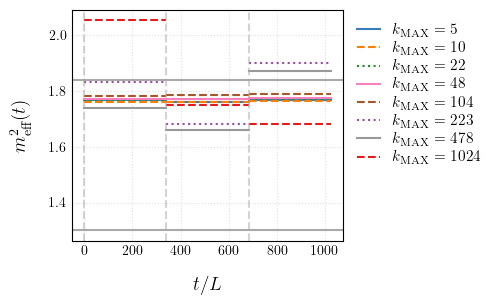

In [134]:
fig, ax = plt.subplots(1, 1, figsize = (3.5,3.))
ax.set_ylabel(r'$m_{\rm eff}^2(t)$')
ax.set_xlabel(r'$t/L$')

ni = 0
lss = ['-', '--', ':', '-', '--', ':', '-', '--', ':', '-', '--', ':']
cych = cycle(allcolors)
for KMAXind, KMAX in enumerate(KMAXList):
    col = next(cych)
    [ax.plot(np.linspace(tslistshort2[ii],tslistshort2[ii+1],10), np.ones(10)*save_meff[ni][KMAXind][ii], color=col, ls=lss[KMAXind], label=(r'$k_{{\rm MAX}}={:.0f}$'.format(KMAXList[KMAXind]) if ii==0 else None))for ii in range(len(tslistshort))]
ax.axhline(m2, color='darkgray')
ax.axhline(m2* (2**0.5), color='darkgray')

[ax.axvline(tslistshort[ii], color='darkgray', alpha=0.5, ls='--') for ii in range(len(tslistshort))]
beautify(ax, bb=(1,1))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


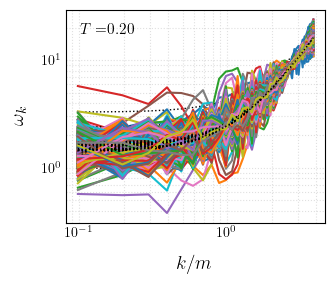

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


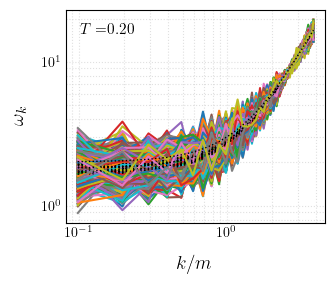

In [68]:
if True:
    meff_func_t = []
    
    tmp = 1
    for ni, num in enumerate(numlist):
        temp, m2, sigmafld = get_model(*general, tmp, case)
        col = next(cols)
        labs = r'${:.2f}$'.format(temp)

        meff_func_t.append([])

        # modes to plot:
        indmax = np.arange(len(klist))[(klist>0.)&(klist<=4.)][-1]
        aa, bb = 1, indmax

        tslist = np.linspace(tlist[0], tlist[-1], 1000)
        fldPS = np.mean(np.abs(fftfld[ni, :])**2. * 2. / nLat**2., axis=0)
        momPS = np.mean(np.abs(fftmom[ni, :])**2. * 2. / nLat**2., axis=0)
        avfldPS, avmomPS = np.zeros((2, len(tslist)-1, knyq))

        avfldPS, avmomPS = np.zeros((2, len(tslist)-1, knyq))
        for ti, (t1, t2) in enumerate(zip(tslist[:-1], tslist[1:])):
            indxt = (tlist>=t1)&(tlist<t2)
            avfldPS[ti] = np.mean(fldPS[indxt], axis=0)
            avmomPS[ti] = np.mean(momPS[indxt], axis=0)
        tslist = tslist[:-1]
        curve = (avmomPS/avfldPS)[:,aa:bb]
        ks = klist[aa:bb]

        w2m = lambda ks, m2: m2 + (2./dx**2.) * (1. - np.cos(ks * dx))
        pred_fit = lambda x, data: sco.curve_fit(w2m, x, data)

        fig, ax = plt.subplots(1, 1, figsize = (3.5,3.))
        plt.plot(ks, w2m(ks, m2), ls='-', lw=1, color='k')
        for tind, tt in enumerate(tslist):
            plt.plot(ks, curve[tind], ls='-')

            best_ps, _ = pred_fit(ks, curve[tind])
            meff_func_t[-1].append([tt, best_ps[0]])
            plt.plot(ks, w2m(ks, *best_ps), color='k', ls=':', lw=1)

        beautify(ax, ttl=r'$T=$'+labs)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_ylabel(r'$\omega_k$')
        ax.set_xlabel(r'$k/m$')
        plt.tight_layout()
        plt.show()

5


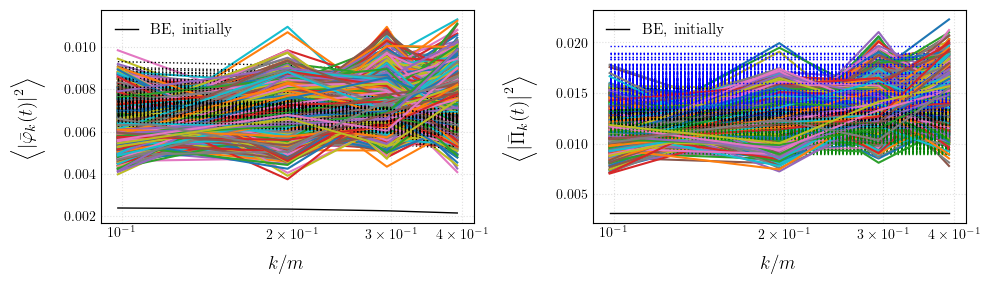

10


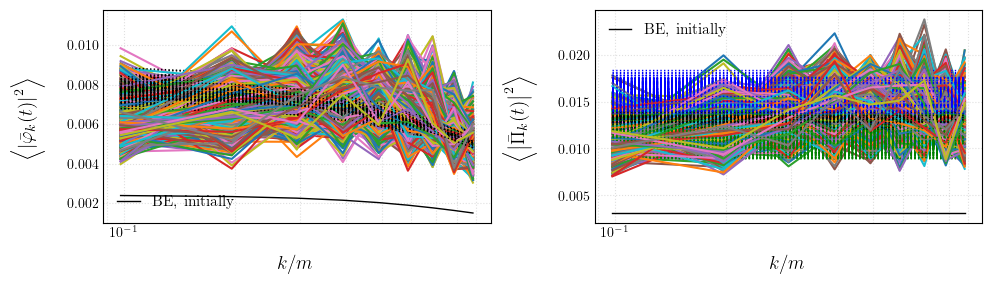

22


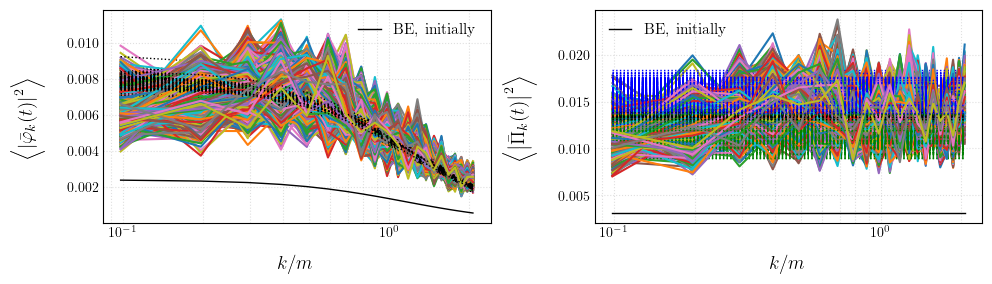

48


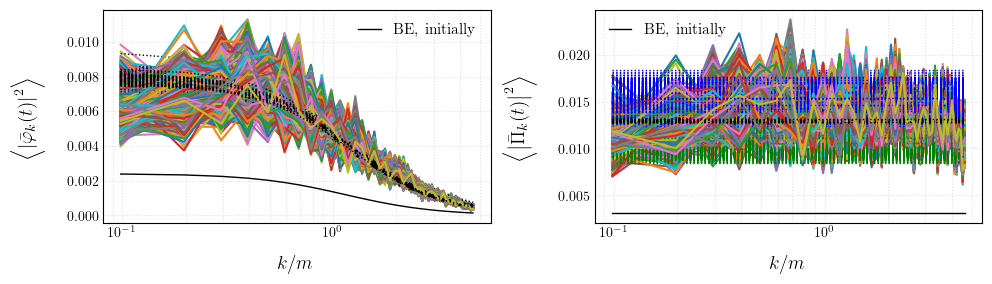

104


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


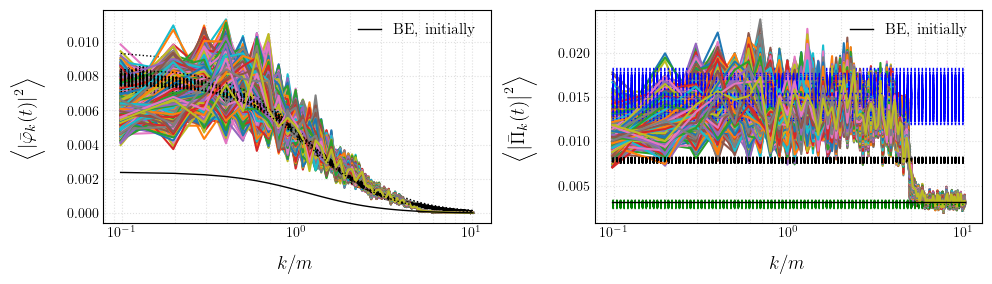

223


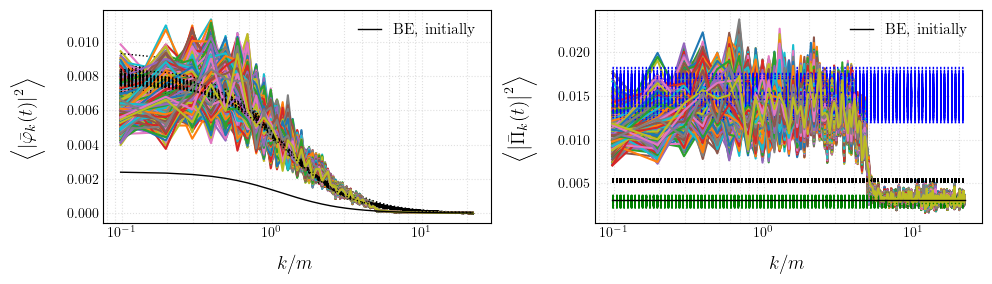

478


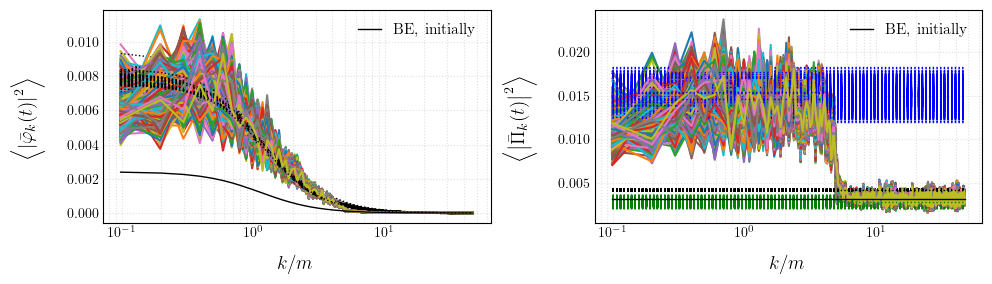

1024


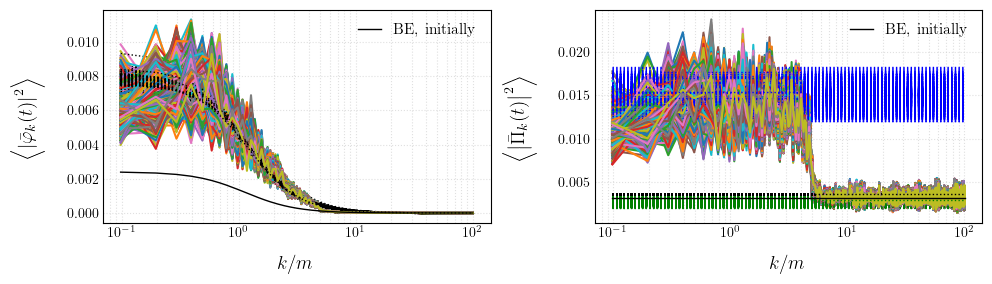

In [139]:
if True:
    teff_func_t, teff_from_mom_lower_bound, teff_from_mom_upper_bound, teff_func_t_from_mom = [], [], [], []
    
    tmp = 1
    KMAXList = [int(ii) for ii in np.geomspace(5, nLat//2, 8)]

    for ni, num in enumerate(numlist):
        if ni!=1: continue

        temp, m2, sigmafld = get_model(*general, tmp, case)
        col = next(cols)
        labs = r'${:.2f}$'.format(temp)

        teff_func_t.append([])
        teff_from_mom_lower_bound.append([])
        teff_from_mom_upper_bound.append([])
        teff_func_t_from_mom.append([])

        for KMAX in KMAXList:
            teff_func_t[-1].append([])
            teff_from_mom_lower_bound[-1].append([])
            teff_from_mom_upper_bound[-1].append([])
            teff_func_t_from_mom[-1].append([])

            # modes to plot:
            indmax = np.argmin(np.abs(np.arange(len(klist)) - KMAX)); print(indmax)
            aa, bb = 1, indmax

            tslist = np.linspace(tlist[0], tlist[-1], 1000)
            fldPS = np.mean(np.abs(fftfld[ni, :])**2. * 2. / nLat**2., axis=0)
            momPS = np.mean(np.abs(fftmom[ni, :])**2. * 2. / nLat**2., axis=0)
            avfldPS, avmomPS = np.zeros((2, len(tslist)-1, knyq))

            avfldPS, avmomPS = np.zeros((2, len(tslist)-1, knyq))
            for ti, (t1, t2) in enumerate(zip(tslist[:-1], tslist[1:])):
                indxt = (tlist>=t1)&(tlist<t2)
                avfldPS[ti] = np.mean(fldPS[indxt], axis=0)
                avmomPS[ti] = np.mean(momPS[indxt], axis=0)
            tslist = tslist[:-1]
            curve = (avmomPS/avfldPS)[:,aa:bb]
            ks = klist[aa:bb]

            w2m    = lambda ks, m2: m2 + (2./dx**2.) * (1. - np.cos(ks * dx))
            pofldk = lambda te,ks,m2: te / lenLat / w2m(ks, m2)
            pomomk = lambda te,ks,m2: te / lenLat / w2m(ks, m2) * w2m(ks, m2)

            fig, ax = plt.subplots(1,2, figsize = (10.,3.))
            for tind, tt in enumerate(tslist):
                if tind!=0:
                    pspecfd = lambda ks, te: pofldk(te, ks, meff_func_t[ni][tind][1])
                    pspecmm = lambda ks, te: pomomk(te, ks, meff_func_t[ni][tind][1])
                else:
                    pspecfd = lambda ks, te: pofldk(te, ks, m2)
                    pspecmm = lambda ks, te: pomomk(te, ks, m2)
                pred_fit_fd = lambda x, data: sco.curve_fit(pspecfd, x, data)
                pred_fit_mm = lambda x, data: sco.curve_fit(pspecmm, x, data)

                curve = avfldPS[tind,aa:bb]
                ax[0].plot(ks, curve, ls='-')

                best_ps, _ = pred_fit_fd(ks, curve)
                
                ni = 0
                
                teff_func_t[ni][-1].append([tt, best_ps[0]])
                ax[0].plot(ks, pspecfd(ks, *best_ps), color='k', lw=1, ls=':')

                curve = avmomPS[tind,aa:bb]
                ax[1].plot(ks, curve, ls='-')

                best_ps, _ = pred_fit_mm(ks, curve)
                teff_func_t_from_mom[ni][-1].append([tt, best_ps[0]])
                ax[1].plot(ks, pspecmm(ks, *best_ps), color='k', lw=1, ls=':')

                cm = np.argmin(curve)
                cm1, cm2 = max(cm-1, 0), min(cm+2, len(ks))
                best_ps, _ = pred_fit_mm(ks[cm1:cm2], curve[cm1:cm2])
                teff_from_mom_lower_bound[ni][-1].append([tt, best_ps[0]])
                ax[1].plot(ks, pspecmm(ks, *best_ps), color='g', lw=1, ls=':')

                dm = np.argmax(curve)
                dm1, dm2 = max(dm-1, 0), min(dm+2, len(ks))
                best_ps, _ = pred_fit_mm(ks[dm1:dm2], curve[dm1:dm2])
                teff_from_mom_upper_bound[ni][-1].append([tt, best_ps[0]])
                ax[1].plot(ks, pspecmm(ks, *best_ps), color='b', lw=1, ls=':')
                
            ni = 1

            ax[0].plot(ks, pofldk(temp, ks, m2), color='k', lw=1, ls='-', label=r'$\rm BE, \; initially$')
            ax[1].plot(ks, pomomk(temp, ks, m2), color='k', lw=1, ls='-', label=r'$\rm BE, \; initially$')

            leg = ax[0].legend(title=r'$T={:.2f}$'.format(temp), ncol=1, frameon=False, loc='best')
            ax[0].set_xscale('log')
            ax[0].set_ylabel(r'$\left\langle \left|\bar{\varphi}_k(t)\right|^2 \right\rangle $')
            ax[0].set_xlabel(r'$k/m$')

            leg = ax[1].legend(title=r'$T={:.2f}$'.format(temp), ncol=1, frameon=False, loc='best')
            ax[1].set_xscale('log')
            ax[1].set_ylabel(r'$\left\langle \left|\bar{\Pi}_k(t)\right|^2 \right\rangle $')
            ax[1].set_xlabel(r'$k/m$')

            beautify(ax)
            plt.tight_layout()
            plt.show()


In [ ]:
save_meff = np.array(save_meff)
meff_func_t = np.array(meff_func_t)
teff_func_t = np.array(teff_func_t)
teff_from_mom_lower_bound = np.array(teff_from_mom_lower_bound)
teff_from_mom_upper_bound = np.array(teff_from_mom_upper_bound)
teff_func_t_from_mom = np.array(teff_func_t_from_mom)

print(massq(tempList))
print(np.array([round(ii,2) for ii in save_meff.flatten()]))

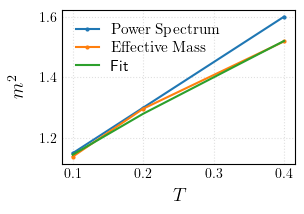

In [31]:
fig, ax = plt.subplots(1,1, figsize = (3,2))
plt.plot(tempList, massq(tempList), 'o-', ms=2, label=r'$\rm Power \; Spectrum$')
plt.plot(tempList, save_meff, 'o-', ms=2, label=r'$\rm Effective \; Mass$')
plt.plot(tempList, massq(tempList) - 0.5*tempList**2., label='Fit')
beautify(ax)
plt.ylabel(r'$m^2$')
plt.xlabel(r'$T$')
plt.show()

TypeError: list indices must be integers or slices, not tuple

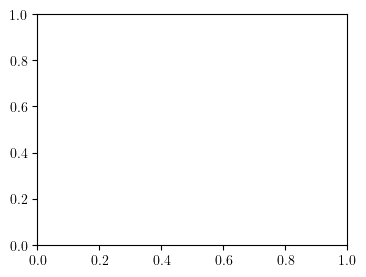

In [140]:
tempList0 = tempList

fig, ax = plt.subplots(1,1, figsize = (4,3))
plt.plot(tempList0, np.mean(teff_func_t[:,:,1], axis=-1), color='b', marker='o', ls='-', ms=2, label=r'$\rm Best \; Fit \; from Field$')

av_teff_from_mom = np.mean(teff_func_t_from_mom[:,:,1], axis=-1)
asymmetric_error = [av_teff_from_mom - np.mean(teff_from_mom_lower_bound[:,:,1], axis=-1), \
                    np.mean(teff_from_mom_upper_bound[:,:,1], axis=-1) - av_teff_from_mom]
plt.errorbar(tempList0, av_teff_from_mom, yerr=asymmetric_error, color='g', marker='o', ls='-', ms=2, label=r'$\rm Best \; Fit \; from Momentum$')

plt.plot(tempList0, tempList0, color='r', marker='o', ls='-', ms=2, label=r'$\rm Bare \; Temperature$')
beautify(ax, bb=(1,1))
plt.ylabel(r'$T_{\rm eff}$')
plt.xlabel(r'$T$')
plt.show()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (3.5,3.))
ax.set_ylabel(r'$m_{\rm eff}^2(t)$')
ax.set_xlabel(r'$t/L$')

ni = 0
lss = ['-', '--', ':', '-', '--', ':', '-', '--', ':', '-', '--', ':']
cych = cycle(allcolors)
for KMAXind, KMAX in enumerate(KMAXList):
    col = next(cych)
    [ax.plot(np.linspace(tslistshort2[ii],tslistshort2[ii+1],10), np.ones(10)*save_meff[ni][KMAXind][ii], color=col, ls=lss[KMAXind], label=(r'$k_{{\rm MAX}}={:.0f}$'.format(KMAXList[KMAXind]) if ii==0 else None))for ii in range(len(tslistshort))]
ax.axhline(m2, color='darkgray')
ax.axhline(m2* (2**0.5), color='darkgray')

[ax.axvline(tslistshort[ii], color='darkgray', alpha=0.5, ls='--') for ii in range(len(tslistshort))]
beautify(ax, bb=(1,1))
plt.show()

cls = cycle(allcolors[:4])
    
tmp = 1
for ni, num in enumerate(numlist):
    temp, m2, sigmafld = get_model(*general, tmp, case)

    fig, ax = plt.subplots(1,2, figsize = (17,3))
    col = next(cls)

    effmass = meff_func_t[tmp,:,1]
    efftemp_fld = teff_func_t[tmp,:,1]
    efftemp_mom = teff_func_t_from_mom[tmp,:,1]
    efftemp_mom_errl = teff_from_mom_lower_bound[tmp,:,1]
    efftemp_mom_erru = teff_from_mom_upper_bound[tmp,:,1]

    ax[0].plot(tslist, effmass, color=col, label=r'$\rm Effective \; Mass \; Probe$')
    ax[0].axhline(np.mean(effmass), color=col, ls='--', label=r'$\rm Average$')
    ax[0].axhline(m2              , color='g', ls='-', label=r'$\rm Initialization$')
    ax[0].set_ylabel(r'$m_{\rm eff}(t)$')
    ax[0].set_xlabel(r'$t/L$')

    [ax[0].plot(np.linspace(tslistshort2[ii],tslistshort2[ii+1],10), np.ones(10)*save_meff[tmp][ii], color=['r','g','b'][ii], ls=':', label=(r'$\rm Average $' if ii==0 else None))for ii in range(len(tslistshort))]
    [ax[0].axvline(tslistshort[ii], color='darkgray', alpha=0.5, ls='--') for ii in range(len(tslistshort))]

 #  l1 = ax[1].fill_between(tslist, efftemp_mom_errl, efftemp_mom_erru, color=col, alpha=0.2)
    l2,= ax[1].plot(tslist, efftemp_fld, color=col, ls='-', label=r'$\rm Field \; Probe$')
    ax[1].plot(tslist, efftemp_mom, color='r', ls='-', label=r'$\rm Momentum \; Probe$')
    ax[1].axhline(temp                , color='g', ls='-', label=r'$\rm Initialization$')
    ax[1].axhline(np.mean(efftemp_fld), color='k', ls=':', label=r'$\rm Average \; Field \; Probe$')
    ax[1].axhline(np.mean(efftemp_mom), color='k', ls='--', label=r'$\rm Average \; Momentum \; Probe$')

    ax[1].set_ylabel(r'$T_{\rm eff}(t)$')
    ax[1].set_xlabel(r'$t/L$')
    beautify(ax, ttl=r'$T={:.2f}$'.format(temp), bb=(1,1))
    plt.tight_layout()
    plt.show()

In [ ]:
cls = cycle(allcolors[:4])
    
tmp = 1
for ni, num in enumerate(numlist):
    temp, m2, sigmafld = get_model(*general, tmp, case)

    fig, ax = plt.subplots(1,2, figsize = (17,3))
    col = next(cls)

    effmass = meff_func_t[tmp,:,1]
    efftemp_fld = teff_func_t[tmp,:,1]
    efftemp_mom = teff_func_t_from_mom[tmp,:,1]
    efftemp_mom_errl = teff_from_mom_lower_bound[tmp,:,1]
    efftemp_mom_erru = teff_from_mom_upper_bound[tmp,:,1]

    ax[0].plot(tslist, effmass, color=col, label=r'$\rm Effective \; Mass \; Probe$')
    ax[0].axhline(np.mean(effmass), color=col, ls='--', label=r'$\rm Average$')
    ax[0].axhline(m2              , color='g', ls='-', label=r'$\rm Initialization$')
    ax[0].set_ylabel(r'$m_{\rm eff}(t)$')
    ax[0].set_xlabel(r'$t/L$')

    [ax[0].plot(np.linspace(tslistshort2[ii],tslistshort2[ii+1],10), np.ones(10)*save_meff[tmp][ii], color=['r','g','b'][ii], ls=':', label=(r'$\rm Average $' if ii==0 else None))for ii in range(len(tslistshort))]
    [ax[0].axvline(tslistshort[ii], color='darkgray', alpha=0.5, ls='--') for ii in range(len(tslistshort))]

 #  l1 = ax[1].fill_between(tslist, efftemp_mom_errl, efftemp_mom_erru, color=col, alpha=0.2)
    l2,= ax[1].plot(tslist, efftemp_fld, color=col, ls='-', label=r'$\rm Field \; Probe$')
    ax[1].plot(tslist, efftemp_mom, color='r', ls='-', label=r'$\rm Momentum \; Probe$')
    ax[1].axhline(temp                , color='g', ls='-', label=r'$\rm Initialization$')
    ax[1].axhline(np.mean(efftemp_fld), color='k', ls=':', label=r'$\rm Average \; Field \; Probe$')
    ax[1].axhline(np.mean(efftemp_mom), color='k', ls='--', label=r'$\rm Average \; Momentum \; Probe$')

    ax[1].set_ylabel(r'$T_{\rm eff}(t)$')
    ax[1].set_xlabel(r'$t/L$')
    beautify(ax, ttl=r'$T={:.2f}$'.format(temp), bb=(1,1))
    plt.tight_layout()
    plt.show()

In [34]:
noamin = False
if noamin:
    fig, ax = plt.subplots(1,1, figsize = (5.,2.7))
    camera = Camera(fig)
    nT, nN = np.shape(fld)
    for tind, tt in enumerate(np.arange(0, nT, 2)):

        ls = plt.plot(np.arange(nN)*dx, fld[tt], ls='-', color=allcolors[0], lw=1)
        ax.axhline(0., ls=':', color='k', lw=0.5)
        ax.set_xlabel(r'$r$')
        ax.set_ylabel(r'$\bar{\varphi}(r)$')
        beautify_anim(ax)
        plt.legend(ls, [r'$t = {:.1f}$'.format(round(tt*dx,1))], loc=1,\
                  frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
        plt.tight_layout()
        camera.snap()
    animation = camera.animate(interval = 0.0001);
    animation.save('./plots/animation_simulation_unbounded.gif', writer = 'imagemagick')


In [35]:
if False:
    for tmp, temp in enumerate(tempList):
        temp, m2, sigmafld = get_model(*general, tmp, case)
        exp_params = np.asarray([nLat, m2, temp])

        tlist = np.arange(duration)
        ALL_toten = np.load(toten_tlist_file(*exp_params, minSim, maxSim))
        ALL_emt   = np.load(emt_tlist_file(*exp_params, minSim, maxSim))
        for sim, (momentum, energy) in enumerate(zip(ALL_emt, ALL_toten)):
            if sim%10!=0: continue

            try: nnrg = np.argwhere(np.isnan(energy)).flatten()[0]
            except: nnrg = len(tlist)+1

            tcut, emtcut, tencut = tlist[:nnrg], momentum[:nnrg], energy[:nnrg]
            fig, ax = plt.subplots(1,1, figsize = (3.5,2.5))
            ax.plot(tcut, (tencut - tencut[0])/tencut[0], label=r'$T^{00}$', ls='-', marker='o', ms=1, color=allcolors[tmp])
          #  ax.plot(tcut, emtcut, label=r'$T^{0x}$', ls='-', marker='o', ms=1)
            ax.set_xlabel(r'$t$')
            ax.set_title(r'${{\rm Simulation}}={:.0f}$'.format(sim), fontsize=11)
            beautify(ax)
            plt.show()
